In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv("kc_house_data.csv")

In [7]:
df = df.drop(['id'], axis=1) #ID is not useful to us it is an index
df.dropna(subset=['view'], inplace=True)
df.waterfront=df.waterfront.fillna(2)
df.yr_renovated = df.yr_renovated.fillna(1)
df = df[df.sqft_basement != '?']
df.view = df.view.astype('int64')
df.floors = df.floors.astype('int64')
df.floors = df.floors.astype('category')
df.view = df.view.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.floors = df.floors.astype('category')
df.sqft_basement = df.sqft_basement.astype('float64')

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1,2.0,0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2,0.0,0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1,0.0,0,3,6,770,0.0,1933,1.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1,0.0,0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1,0.0,0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Question, when are the best times of the year to purchase a home?

In [9]:
df.date.value_counts()

6/23/2014     139
6/25/2014     130
7/8/2014      126
6/26/2014     125
3/25/2015     122
4/27/2015     120
4/28/2015     119
6/24/2014     119
4/22/2015     118
4/14/2015     118
7/9/2014      116
8/26/2014     115
7/14/2014     115
4/21/2015     115
10/28/2014    114
7/1/2014      114
4/8/2015      110
6/17/2014     110
4/29/2015     110
5/20/2014     110
8/20/2014     110
4/23/2015     109
7/29/2014     108
7/16/2014     108
5/28/2014     108
3/27/2015     108
8/11/2014     106
7/23/2014     105
6/20/2014     105
8/25/2014     104
             ... 
5/9/2015        3
10/5/2014       3
3/15/2015       3
2/14/2015       3
12/7/2014       2
8/9/2014        2
8/24/2014       2
9/7/2014        2
11/28/2014      2
5/11/2014       2
12/27/2014      2
2/1/2015        2
12/21/2014      2
5/10/2015       2
7/4/2014        2
10/11/2014      2
11/15/2014      2
5/27/2015       1
3/8/2015        1
1/10/2015       1
1/17/2015       1
8/3/2014        1
11/2/2014       1
7/27/2014       1
5/24/2015 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
date             21082 non-null object
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null category
waterfront       21082 non-null float64
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: category(4), float64(7), int64(8), object(1)
memory usage: 2.8+ MB


In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
date             21082 non-null datetime64[ns]
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null category
waterfront       21082 non-null float64
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: category(4), datetime64[ns](1), float64(7), int64(8)
memory usage: 2.8 MB


In [116]:
df_date = df.sort_values('date')
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 16754 to 16580
Data columns (total 20 columns):
date             21082 non-null datetime64[ns]
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null category
waterfront       21082 non-null float64
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: category(4), datetime64[ns](1), float64(7), int64(8)
memory usage: 2.8 MB


In [119]:
df_date.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17383,2015-05-14,855000.0,3,1.75,1900,4000,1,0.0,0,3,7,1300,600.0,1965,1.0,98103,47.6854,-122.331,1880,4000
7891,2015-05-14,183000.0,3,1.00,1170,7320,1,0.0,0,3,7,1170,0.0,1962,0.0,98188,47.4685,-122.282,2040,7320
5632,2015-05-15,450000.0,5,2.00,1870,7344,1,0.0,0,3,7,1870,0.0,1960,0.0,98007,47.5951,-122.144,1870,7650
13040,2015-05-24,445500.0,2,1.75,1390,6670,1,0.0,0,3,6,720,670.0,1941,0.0,98115,47.6914,-122.308,920,6380
16580,2015-05-27,1310000.0,4,2.25,3750,5000,2,0.0,0,5,8,2440,1310.0,1924,0.0,98115,47.6747,-122.303,2170,4590


Here I have created a histogram showing the number of homes sold per month.  This will show the highest traffic for home sales in the county.

Text(0.5, 1.0, 'Homes Sold By Month')

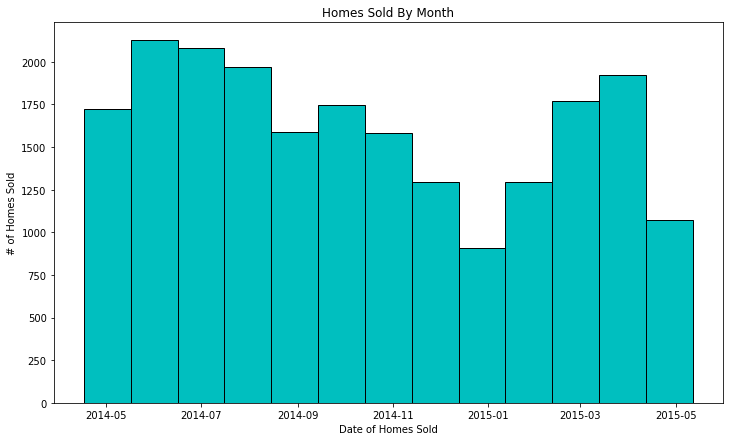

In [188]:
df.date.hist(figsize=(12,7), color='c', edgecolor='black', bins=13, align='left', grid=False)
plt.xlabel('Date of Homes Sold')
plt.ylabel('# of Homes Sold')
plt.title('Homes Sold By Month')


## Question 2, What are the zipcodes, or areas around King County, where the most homes were purchased?  

Text(0.5, 1.0, 'Homes Sold By Zipcode')

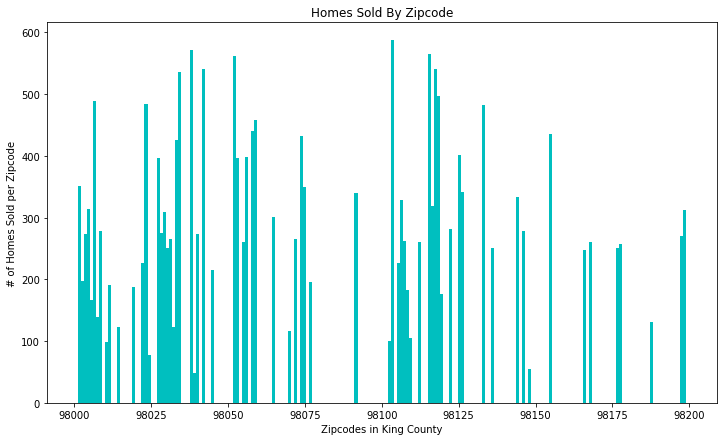

In [187]:
df.zipcode.hist(bins=200, figsize=(12,7), grid=False, color='c')
plt.xlabel('Zipcodes in King County')
plt.ylabel('# of Homes Sold per Zipcode')
plt.title('Homes Sold By Zipcode')

In [40]:
df.zipcode.value_counts()

98103    587
98038    571
98115    565
98052    561
98117    541
98042    540
98034    536
98118    497
98006    489
98023    484
98133    483
98059    458
98058    441
98155    435
98074    432
98033    425
98125    401
98056    398
98027    396
98053    396
98001    351
98075    349
98126    342
98092    340
98144    334
98106    329
98116    318
98004    314
98199    313
98029    309
        ... 
98107    262
98055    261
98168    261
98112    260
98178    258
98177    251
98136    251
98030    250
98166    248
98022    227
98105    226
98045    215
98002    198
98077    196
98011    191
98019    188
98108    183
98119    176
98005    167
98007    139
98188    131
98014    122
98032    122
98070    116
98109    105
98102    100
98010     98
98024     78
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

## Zipcodes in the 98100-98125 range are shown by the model to influence a higher home price.  Two of the top three are in this range, 98103 and 98115.

## Are homes located on the waterfront affordable?

In [189]:
df1 = df[df.waterfront != 0] #null values were binned out, dropping waterfront here because 0=not on waterfront.  Dropping =2 because these are nulls.

In [48]:
df1 = df1[df1.waterfront != 2] 

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 49 to 21560
Data columns (total 20 columns):
date             141 non-null datetime64[ns]
price            141 non-null float64
bedrooms         141 non-null int64
bathrooms        141 non-null float64
sqft_living      141 non-null int64
sqft_lot         141 non-null int64
floors           141 non-null category
waterfront       141 non-null float64
view             141 non-null category
condition        141 non-null category
grade            141 non-null category
sqft_above       141 non-null int64
sqft_basement    141 non-null float64
yr_built         141 non-null int64
yr_renovated     141 non-null float64
zipcode          141 non-null int64
lat              141 non-null float64
long             141 non-null float64
sqft_living15    141 non-null int64
sqft_lot15       141 non-null int64
dtypes: category(4), datetime64[ns](1), float64(7), int64(8)
memory usage: 20.2 KB


In [50]:
df1.grade.value_counts()

8     31
10    28
9     20
7     20
11    19
6     10
12     9
5      4
13     0
4      0
3      0
Name: grade, dtype: int64

In [57]:
df1 = df1.sort_values('grade')

In [60]:
df1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1166,2014-10-09,290000.0,2,0.75,440,8313,1,1.0,3,4,5,440,0.0,1943,0.0,98070,47.4339,-122.512,880,26289
15357,2015-01-14,658000.0,2,1.00,1010,14244,1,1.0,4,1,5,1010,0.0,1926,0.0,98136,47.5476,-122.399,1820,15792
264,2014-10-27,369900.0,1,0.75,760,10079,1,1.0,4,5,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
18261,2014-11-17,285000.0,1,1.00,1060,54846,1,1.0,4,3,5,1060,0.0,1935,0.0,98070,47.4716,-122.445,2258,31762
6096,2014-09-17,340000.0,2,0.75,1060,48292,1,1.0,2,5,6,560,500.0,1947,0.0,98070,47.4285,-122.511,750,80201
18023,2014-06-27,528000.0,2,0.75,840,40642,1,1.0,4,4,6,840,0.0,1937,0.0,98070,47.4040,-122.447,1850,64069
18987,2014-06-16,385000.0,2,1.00,830,26329,1,1.0,3,4,6,830,0.0,1928,0.0,98070,47.4012,-122.425,2030,27338
1080,2014-08-27,825000.0,2,1.00,1150,12775,1,1.0,4,4,6,1150,0.0,1908,0.0,98178,47.5020,-122.222,2440,11852
2073,2014-05-12,1200000.0,3,1.75,1560,8078,1,1.0,4,4,6,1560,0.0,1928,0.0,98040,47.5779,-122.246,2890,16710
1947,2015-04-20,480000.0,2,1.50,1008,26487,1,1.0,4,4,6,1008,0.0,1943,2002.0,98070,47.3853,-122.479,1132,24079


Breakdown of home sales on the waterfront by grade.

Text(0.5, 1.0, 'Homes Sold on the Waterfront By Grade')

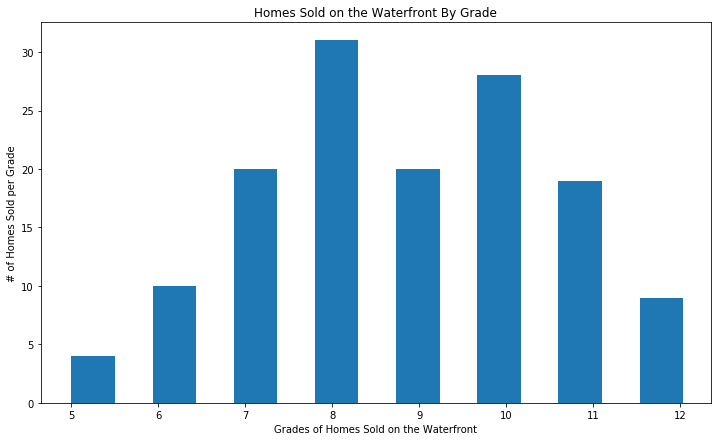

In [185]:
df1.grade.hist(figsize=(12,7), grid=False, bins=15, width=0.5)
plt.xlabel('Grades of Homes Sold on the Waterfront')
plt.ylabel('# of Homes Sold per Grade')
plt.title('Homes Sold on the Waterfront By Grade')
 

Now determining the average price of a home on the waterfront by grade.

In [68]:
df1.groupby('grade')
df1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1166,2014-10-09,290000.0,2,0.75,440,8313,1,1.0,3,4,5,440,0.0,1943,0.0,98070,47.4339,-122.512,880,26289
15357,2015-01-14,658000.0,2,1.00,1010,14244,1,1.0,4,1,5,1010,0.0,1926,0.0,98136,47.5476,-122.399,1820,15792
264,2014-10-27,369900.0,1,0.75,760,10079,1,1.0,4,5,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
18261,2014-11-17,285000.0,1,1.00,1060,54846,1,1.0,4,3,5,1060,0.0,1935,0.0,98070,47.4716,-122.445,2258,31762
6096,2014-09-17,340000.0,2,0.75,1060,48292,1,1.0,2,5,6,560,500.0,1947,0.0,98070,47.4285,-122.511,750,80201
18023,2014-06-27,528000.0,2,0.75,840,40642,1,1.0,4,4,6,840,0.0,1937,0.0,98070,47.4040,-122.447,1850,64069
18987,2014-06-16,385000.0,2,1.00,830,26329,1,1.0,3,4,6,830,0.0,1928,0.0,98070,47.4012,-122.425,2030,27338
1080,2014-08-27,825000.0,2,1.00,1150,12775,1,1.0,4,4,6,1150,0.0,1908,0.0,98178,47.5020,-122.222,2440,11852
2073,2014-05-12,1200000.0,3,1.75,1560,8078,1,1.0,4,4,6,1560,0.0,1928,0.0,98040,47.5779,-122.246,2890,16710
1947,2015-04-20,480000.0,2,1.50,1008,26487,1,1.0,4,4,6,1008,0.0,1943,2002.0,98070,47.3853,-122.479,1132,24079


In [70]:
df1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [71]:
df1 = df1.drop(['date','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition','sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], axis=1)
df1.head()

,price,grade
1166,290000.0,5
15357,658000.0,5
264,369900.0,5
18261,285000.0,5
6096,340000.0,6


In [80]:
df1

,price,grade
1166,290000.0,5
15357,658000.0,5
264,369900.0,5
18261,285000.0,5
6096,340000.0,6
18023,528000.0,6
18987,385000.0,6
1080,825000.0,6
2073,1200000.0,6
1947,480000.0,6


In [81]:
df2 = df1.groupby('grade')

In [82]:
df2

In [85]:
df2.price.mean()

grade
3              NaN
4              NaN
5     4.007250e+05
6     6.053000e+05
7     8.422750e+05
8     1.312369e+06
9     1.371000e+06
10    2.267500e+06
11    2.938947e+06
12    3.174444e+06
13             NaN
Name: price, dtype: float64

In [102]:
mean = [400725, 605300, 842275, 1312369, 1371000, 2267500, 2938947, 3174444]
grade = [5,6,7,8,9,10,11,12]

In [109]:
mean_df = pd.DataFrame({'grade': grade,'mean_price': mean})

In [110]:
mean_df

,grade,mean_price
0,5,400725
1,6,605300
2,7,842275
3,8,1312369
4,9,1371000
5,10,2267500
6,11,2938947
7,12,3174444


Created a table to show the mean_price of a waterfront home by grade.